# **Spam Email classifier**

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df=pd.read_csv('./spam_ham_dataset.csv',usecols=['label','text','label_num'])
df.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [9]:
df.label.value_counts()

label
ham     3672
spam    1499
Name: count, dtype: int64

In [13]:
df.rename(columns={'label_num':'is_spam'},inplace=True)

In [15]:
df

,label,text,is_spam
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,ham,Subject: industrial worksheets for august 2000...,0


In [43]:
df.text.head(2)

0    Subject: enron methanol ; meter # : 988291\r\n...
1    Subject: hpl nom for january 9 , 2001\r\n( see...
Name: text, dtype: object

([<matplotlib.axis.XTick at 0x715e8f634740>,
 [Text(0, 0, 'Not Spam'), Text(1, 0, 'Spam')])

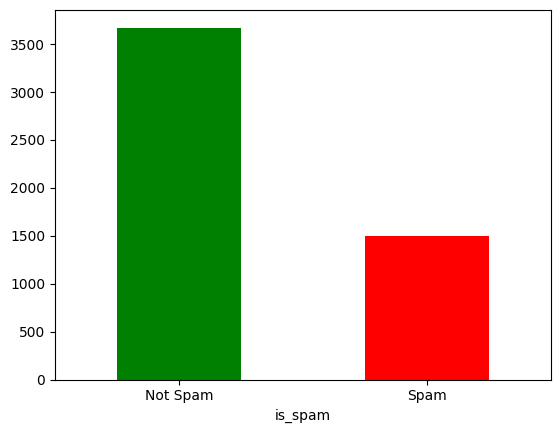

In [71]:
spam_count=df.is_spam.value_counts()
spam_count.plot(kind='bar',color=['green','red'])
plt.xticks(ticks=[0, 1], labels=["Not Spam", "Spam"], rotation=0)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(df.text,df.is_spam,test_size=0.2)

In [21]:
X_train.shape

(4136,)

In [23]:
X_test.shape

(1035,)

In [25]:
vectorizer=CountVectorizer()

In [27]:
X_cv=vectorizer.fit_transform(X_train.values)

In [40]:
vectorizer.get_feature_names_out()[4300:4400]# Represents the Vocabulary

array(['abridgment', 'abroad', 'abrogate', 'abryou', 'abscess',
       'abscissa', 'abscissae', 'absence', 'absences', 'absense',
       'absent', 'absentee', 'absenteeism', 'absently', 'absentminded',
       'abshm', 'absoiuteiy', 'absolue', 'absolute', 'absolutely',
       'absolutionelision', 'absorb', 'absorbed', 'absorbent',
       'absorption', 'absorptionbark', 'abstain', 'abstention',
       'abstinent', 'abstract', 'abstracter', 'abstractor', 'abstracts',
       'abtyw', 'abundance', 'abundant', 'aburrell', 'abusable', 'abuse',
       'abused', 'abusive', 'abut', 'abutted', 'abvcm', 'abvps', 'abyss',
       'abyssinia', 'abzt', 'abzubestellen', 'abzuheben', 'ac', 'acacia',
       'academe', 'academician', 'academies', 'academy', 'acadia', 'acai',
       'acal', 'acapulco', 'acaso', 'acc', 'accede', 'accedepuerto',
       'accedez', 'accelerate', 'accelerated', 'acceleration',
       'accelerometer', 'accent', 'accentual', 'accentuate', 'accept',
       'acceptable', 'acceptanc

In [41]:
X_cv.shape

(4136, 44286)

In [44]:
from sklearn.naive_bayes import MultinomialNB

In [45]:
model =MultinomialNB()

In [47]:
model.fit(X_cv,Y_train)

MultinomialNB()

In [48]:
X_test_cv=vectorizer.transform(X_test.values)

In [51]:
prediction=model.predict(X_test_cv)

In [74]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [53]:
print(classification_report(Y_test,prediction))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       722
           1       0.96      0.96      0.96       313

    accuracy                           0.97      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.97      0.97      0.97      1035



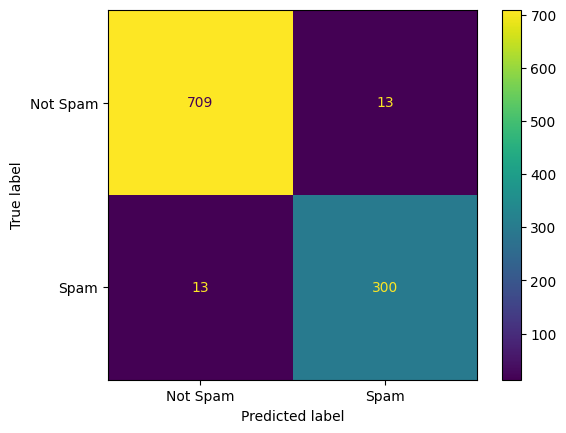

In [76]:
ConfusionMatrixDisplay.from_predictions(Y_test,prediction,display_labels=['Not Spam','Spam'])

In [55]:
emails=['''Subject: Congratulations! You've Won a $1000 Gift Card 🎁

Body:

Dear User,

We are excited to inform you that you've been selected to receive a FREE $1000 Walmart Gift Card! 🎉

To claim your prize, simply click the link below and fill out the short survey:

👉 [Click Here to Claim Now](http://suspicious-link.com)

Hurry! This offer is valid for the next 24 hours only.

Best regards,  
Rewards Department''',
'''Subject: Reminder: AI Project Meeting on Monday at 10 AM

Body:
Hi Ahmad,

This is a reminder that our AI project group will meet this Monday at 10 AM in Lab 3.

Please bring your updated progress report and be ready to discuss model evaluation strategies.

Let me know if you need any help before then.

Best,  
Dr. Ahsan  
Artificial Intelligence Department''']

In [57]:
mails=vectorizer.transform(emails)

In [58]:
model.predict(mails)

array([1, 0])

# **News Classification**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df=pd.read_json('./News_Category_Dataset_v3.json',lines=True)
df=df[['category','headline','short_description']]
df

,category,headline,short_description
0,U.S. NEWS,Over 4 Million Americans Roll Up Sleeves For O...,Health experts said it is too early to predict...
1,U.S. NEWS,"American Airlines Flyer Charged, Banned For Li...",He was subdued by passengers and crew when he ...
2,COMEDY,23 Of The Funniest Tweets About Cats And Dogs ...,"""Until you have a dog you don't understand wha..."
3,PARENTING,The Funniest Tweets From Parents This Week (Se...,"""Accidentally put grown-up toothpaste on my to..."
4,U.S. NEWS,Woman Who Called Cops On Black Bird-Watcher Lo...,Amy Cooper accused investment firm Franklin Te...
...,...,...,...
209522,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,Verizon Wireless and AT&T are already promotin...
209523,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,"Afterward, Azarenka, more effusive with the pr..."
209524,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...","Leading up to Super Bowl XLVI, the most talked..."
209525,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,CORRECTION: An earlier version of this story i...


In [8]:
df['short_description'].iloc[0]

'Health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.'

In [9]:
df['category'].value_counts()

category
POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATI

In [10]:
df['category'] = df['category'].replace({
    'THE WORLDPOST': 'WORLDPOST',
    'PARENTS': 'PARENTING',
    'STYLE': 'STYLE & BEAUTY',
    'ARTS': 'ARTS & CULTURE',
    'CULTURE & ARTS': 'ARTS & CULTURE'
})

In [11]:
df.category.value_counts()

category
POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
PARENTING         12746
STYLE & BEAUTY    12068
TRAVEL             9900
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
WORLDPOST          6243
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
ARTS & CULTURE     3922
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
RELIGION           2577
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
COLLEGE            1144
LATINO VOICES      1130
EDUCATION          1014
Name: count, dtype: int64

In [12]:
from sklearn.utils import resample
def under_sample(df,target,sample_size=3000,random_state=43):
    balanced_dfs=[]
    
    for category in df[target].unique():
        category_df=df[df[target]==category]
    
        if len(category_df)<=sample_size:
            continue
        else:
            undersampled = resample(category_df, 
                                      n_samples=sample_size, 
                                      random_state=random_state,
                                      replace=False)
            balanced_dfs.append(undersampled)
        
    balanced_dfs = pd.concat(balanced_dfs, ignore_index=True)
    return balanced_dfs

In [13]:
df=under_sample(df,'category')

In [14]:
df

,category,headline,short_description
0,COMEDY,Nick Offerman Is Ready To Hang Up His Mustache,
1,COMEDY,"We All Go To The Gym For One Reason, And It's ...","""It's all about making your ex be like, 'DAAAA..."
2,COMEDY,Patronizing Paychecks,Yeah. Easy to see how paying ladies the same w...
3,COMEDY,The Funniest 2012 Halloween Costumes: Add Your...,After we gave you some pretty awesome Hallowee...
4,COMEDY,"Cat Learns To Open Doors, Will Haunt Your Dreams",
...,...,...,...
65995,DIVORCE,The Six Personal Traits That Help Women Succes...,Every woman who walks into our office wants an...
65996,DIVORCE,"Cheater Meant To Text Mistress, But Texted Wif...",Word to the wise: If you have the audacity to ...
65997,DIVORCE,I Burned The Wedding Dress I Never Got To Wear...,He came with me to the dress shop and picked i...
65998,DIVORCE,I Self-Medicated To Cope With My Bad Marriage,The signs of substance misuse include (but are...


In [15]:
df['category'].nunique()

22

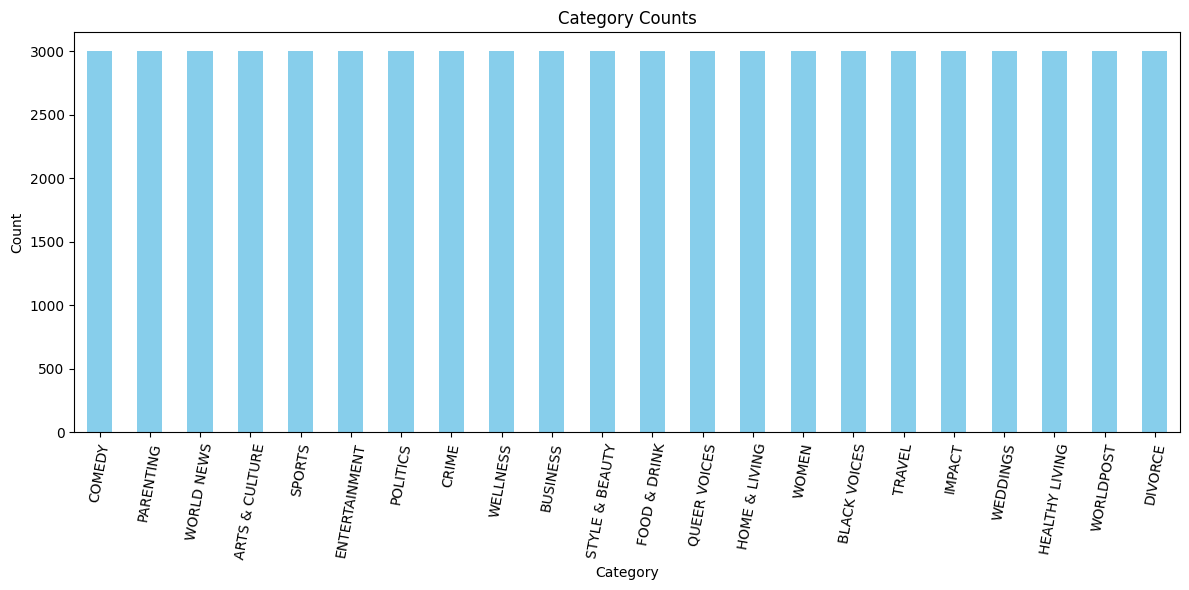

In [16]:
plt.figure(figsize=(12, 6)) 
df.category.value_counts().plot(kind='bar',color='skyblue')
plt.title('Category Counts')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

In [19]:
df['category_num']=df.category.map(
{
 'POLITICS': 0,'WELLNESS': 1,'ENTERTAINMENT': 2,'PARENTING': 3,'STYLE & BEAUTY': 4,
 'TRAVEL': 5,'HEALTHY LIVING': 6,'QUEER VOICES': 7,'FOOD & DRINK': 8,'WORLDPOST': 9,
 'BUSINESS': 10,'COMEDY': 11,'SPORTS': 12,'BLACK VOICES': 13,'HOME & LIVING': 14,
 'ARTS & CULTURE': 15,'WEDDINGS': 16,'WOMEN': 17,'CRIME': 18,'IMPACT': 19,'DIVORCE': 20,
 'WORLD NEWS': 21,'MEDIA': 22,'WEIRD NEWS': 23,'GREEN': 24,'RELIGION': 25,'SCIENCE': 26,
 'TECH': 27,'TASTE': 28,'MONEY': 29,'ENVIRONMENT': 30,'FIFTY': 31,'GOOD NEWS': 32,
 'U.S. NEWS': 33,'COLLEGE': 34,'LATINO VOICES': 35,'EDUCATION': 36
}
)

In [20]:
df

,category,headline,short_description,category_num
0,COMEDY,Nick Offerman Is Ready To Hang Up His Mustache,,11
1,COMEDY,"We All Go To The Gym For One Reason, And It's ...","""It's all about making your ex be like, 'DAAAA...",11
2,COMEDY,Patronizing Paychecks,Yeah. Easy to see how paying ladies the same w...,11
3,COMEDY,The Funniest 2012 Halloween Costumes: Add Your...,After we gave you some pretty awesome Hallowee...,11
4,COMEDY,"Cat Learns To Open Doors, Will Haunt Your Dreams",,11
...,...,...,...,...
65995,DIVORCE,The Six Personal Traits That Help Women Succes...,Every woman who walks into our office wants an...,20
65996,DIVORCE,"Cheater Meant To Text Mistress, But Texted Wif...",Word to the wise: If you have the audacity to ...,20
65997,DIVORCE,I Burned The Wedding Dress I Never Got To Wear...,He came with me to the dress shop and picked i...,20
65998,DIVORCE,I Self-Medicated To Cope With My Bad Marriage,The signs of substance misuse include (but are...,20


In [171]:
from sklearn.model_selection import train_test_split

In [212]:
X_train,X_test,Y_train,Y_test=train_test_split(df['headline'],df['category_num'],
                        test_size=0.2,random_state=43,stratify=df.category_num)

In [180]:
X_train.count()

np.int64(52800)

In [181]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [257]:
clf=Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(1,2))),
    ('Naive_bayes',MultinomialNB())
])



In [183]:
clf.fit(X_train,Y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('Naive_bayes', MultinomialNB())])

In [184]:
y_pred=clf.predict(X_test)

In [185]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.59      0.57       600
           1       0.46      0.36      0.41       600
           2       0.52      0.48      0.50       600
           3       0.51      0.54      0.52       600
           4       0.65      0.68      0.66       600
           5       0.65      0.58      0.61       600
           6       0.35      0.41      0.38       600
           7       0.64      0.66      0.65       600
           8       0.79      0.71      0.75       600
           9       0.58      0.45      0.51       600
          10       0.60      0.47      0.53       600
          11       0.56      0.52      0.54       600
          12       0.76      0.69      0.72       600
          13       0.59      0.49      0.53       600
          14       0.63      0.79      0.70       600
          15       0.55      0.47      0.51       600
          16       0.74      0.73      0.73       600
          17       0.44    

In [189]:
X_test[:10]

55217    Bethenny Frankel Sex Life: 'I'm A Morning Sex ...
41668    How To Clean An Outdoor Air Conditioner Withou...
4623               Coast To Coast: Kids' Classes That Rock
25840    'Push Girls', Sundance TV Show, Breaks Wheelch...
34066                    13 Smashing Recipes For Derby Day
30507                             Fashion and Philanthropy
33304    Family Recipes: How A Green Soup Recipe Can He...
65784     Separated But Not Divorced: Should You Date Him?
47315    'Queen Sugar' Cast On Ava DuVernay’s Push For ...
38357    Gay Boxer Will Honor Orlando Victims With Upco...
Name: headline, dtype: object

In [190]:
Y_test[:10]

55217    16
41668    14
4623      3
25840     1
34066     8
30507     4
33304     8
65784    20
47315    13
38357     7
Name: category_num, dtype: int64

In [191]:
y_pred[:10]

array([20, 14,  5,  2,  8,  4,  8, 20, 13,  7])

In [194]:
import spacy as sc
nlp=sc.load('en_core_web_sm')

def preprocess(text):
    doc=nlp(text)
    filtered=[word.lemma_ for word in doc if not word.is_stop and not word.is_punct]
    return ' '.join(filtered)

In [195]:
df['preprocessed']=df.headline.apply(preprocess)

In [196]:
X_train,X_test,Y_train,Y_test=train_test_split(df['preprocessed'],df['category_num'],
                        test_size=0.2,random_state=43,stratify=df.category_num)

In [207]:
df

,category,headline,short_description,category_num,preprocessed
0,COMEDY,Nick Offerman Is Ready To Hang Up His Mustache,,11,Nick Offerman ready hang mustache
1,COMEDY,"We All Go To The Gym For One Reason, And It's ...","""It's all about making your ex be like, 'DAAAA...",11,Gym Reason health
2,COMEDY,Patronizing Paychecks,Yeah. Easy to see how paying ladies the same w...,11,patronize paycheck
3,COMEDY,The Funniest 2012 Halloween Costumes: Add Your...,After we gave you some pretty awesome Hallowee...,11,Funniest 2012 Halloween costume add photo
4,COMEDY,"Cat Learns To Open Doors, Will Haunt Your Dreams",,11,Cat learn open door haunt dream
...,...,...,...,...,...
65995,DIVORCE,The Six Personal Traits That Help Women Succes...,Every woman who walks into our office wants an...,20,Personal Traits help woman successfully surviv...
65996,DIVORCE,"Cheater Meant To Text Mistress, But Texted Wif...",Word to the wise: If you have the audacity to ...,20,cheater mean Text mistress Texted Wife instead...
65997,DIVORCE,I Burned The Wedding Dress I Never Got To Wear...,He came with me to the dress shop and picked i...,20,burn wedding dress got wear buy
65998,DIVORCE,I Self-Medicated To Cope With My Bad Marriage,The signs of substance misuse include (but are...,20,Self Medicated cope Bad marriage


In [208]:
from sklearn.ensemble import RandomForestClassifier

In [209]:
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('Random_Forest',RandomForestClassifier())
])


In [210]:
clf.fit(X_train,Y_train)
pred=clf.predict(X_test)
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.55      0.51      0.53       600
           1       0.22      0.34      0.27       600
           2       0.52      0.31      0.39       600
           3       0.42      0.55      0.47       600
           4       0.67      0.63      0.65       600
           5       0.49      0.59      0.53       600
           6       0.27      0.29      0.28       600
           7       0.63      0.60      0.62       600
           8       0.62      0.69      0.65       600
           9       0.49      0.43      0.46       600
          10       0.52      0.48      0.50       600
          11       0.54      0.49      0.51       600
          12       0.68      0.57      0.62       600
          13       0.57      0.36      0.44       600
          14       0.68      0.66      0.67       600
          15       0.55      0.42      0.48       600
          16       0.68      0.78      0.73       600
          17       0.38    

In [211]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [228]:
X_train,X_test,Y_train,Y_test=train_test_split(df['headline'],df['category_num'],
                        test_size=0.2,random_state=43,stratify=df.category_num)

In [229]:
clf=Pipeline([
    ('vectorizer',TfidfVectorizer()),
    ('model',KNeighborsClassifier())
])
clf.fit(X_train,Y_train)
pred=clf.predict(X_test)
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.30      0.46      0.36       600
           1       0.19      0.45      0.26       600
           2       0.35      0.39      0.37       600
           3       0.25      0.40      0.31       600
           4       0.45      0.48      0.47       600
           5       0.43      0.56      0.49       600
           6       0.20      0.22      0.21       600
           7       0.21      0.61      0.31       600
           8       0.70      0.58      0.63       600
           9       0.52      0.34      0.41       600
          10       0.57      0.30      0.39       600
          11       0.59      0.35      0.44       600
          12       0.78      0.45      0.57       600
          13       0.59      0.30      0.40       600
          14       0.70      0.55      0.62       600
          15       0.61      0.23      0.33       600
          16       0.63      0.56      0.59       600
          17       0.47    

In [233]:
X_test[5:10]

30507                             Fashion and Philanthropy
33304    Family Recipes: How A Green Soup Recipe Can He...
65784     Separated But Not Divorced: Should You Date Him?
47315    'Queen Sugar' Cast On Ava DuVernay’s Push For ...
38357    Gay Boxer Will Honor Orlando Victims With Upco...
Name: headline, dtype: object

In [234]:
Y_test[5:10]

30507     4
33304     8
65784    20
47315    13
38357     7
Name: category_num, dtype: int64

In [235]:
pred[5:10]

array([19,  8, 20, 13,  7])

In [245]:
sample_sentences=["Senate Passes New Climate Bill After Months of Negotiation",
    "5 Simple Habits to Improve Your Mental Health",
    "Oscar Winners 2025: Full List of This Year’s Top Films",
    "Apple Unveils Revolutionary AI-Powered VisionOS Device",
    "France Defeats Argentina in Thrilling World Cup Final",
     "The Benefits of a Plant-Based Diet, Backed by Science",
     "Top 10 Budget-Friendly Destinations for 2025",
     "NASA Discovers Earth-Like Planet in Habitable Zone",
     "Chefs Reveal the Secret to Perfect Homemade Pasta",
     "FBI Cracks Down on Nationwide Cyber Fraud Ring"]

In [246]:
pred_lst=[]
for sentence in sample_sentences:
    pred_lst.append(clf.predict([sentence]))

| Category | ID | Category | ID | Category | ID |
|----------|-------|----------|-------|----------|-------|
| POLITICS | 0 | WELLNESS | 1 | ENTERTAINMENT | 2 |
| PARENTING | 3 | STYLE & BEAUTY | 4 | TRAVEL | 5 |
| HEALTHY LIVING | 6 | QUEER VOICES | 7 | FOOD & DRINK | 8 |
| WORLDPOST | 9 | BUSINESS | 10 | COMEDY | 11 |
| SPORTS | 12 | BLACK VOICES | 13 | HOME & LIVING | 14 |
| ARTS & CULTURE | 15 | WEDDINGS | 16 | WOMEN | 17 |
| CRIME | 18 | IMPACT | 19 | DIVORCE | 20 |
| WORLD NEWS | 21 | MEDIA | 22 | WEIRD NEWS | 23 |
| GREEN | 24 | RELIGION | 25 | SCIENCE | 26 |
| TECH | 27 | TASTE | 28 | MONEY | 29 |
| ENVIRONMENT | 30 | FIFTY | 31 | GOOD NEWS | 32 |
| U.S. NEWS | 33 | COLLEGE | 34 | LATINO VOICES | 35 |
| EDUCATION | 36 | | | | |

In [256]:
categories={
 'POLITICS': 0,'WELLNESS': 1,'ENTERTAINMENT': 2,'PARENTING': 3,'STYLE & BEAUTY': 4,
 'TRAVEL': 5,'HEALTHY LIVING': 6,'QUEER VOICES': 7,'FOOD & DRINK': 8,'WORLDPOST': 9,
 'BUSINESS': 10,'COMEDY': 11,'SPORTS': 12,'BLACK VOICES': 13,'HOME & LIVING': 14,
 'ARTS & CULTURE': 15,'WEDDINGS': 16,'WOMEN': 17,'CRIME': 18,'IMPACT': 19,'DIVORCE': 20,
 'WORLD NEWS': 21,'MEDIA': 22,'WEIRD NEWS': 23,'GREEN': 24,'RELIGION': 25,'SCIENCE': 26,
 'TECH': 27,'TASTE': 28,'MONEY': 29,'ENVIRONMENT': 30,'FIFTY': 31,'GOOD NEWS': 32,
 'U.S. NEWS': 33,'COLLEGE': 34,'LATINO VOICES': 35,'EDUCATION': 36
}

inv_categories = {v: k for k, v in categories.items()}

for sentence, prediction in zip(sample_sentences, pred_lst):
    print(sentence, '|', inv_categories[int(prediction)])


Senate Passes New Climate Bill After Months of Negotiation | QUEER VOICES
5 Simple Habits to Improve Your Mental Health | WELLNESS
Oscar Winners 2025: Full List of This Year’s Top Films | ARTS & CULTURE
Apple Unveils Revolutionary AI-Powered VisionOS Device | QUEER VOICES
France Defeats Argentina in Thrilling World Cup Final | SPORTS
The Benefits of a Plant-Based Diet, Backed by Science | WELLNESS
Top 10 Budget-Friendly Destinations for 2025 | POLITICS
NASA Discovers Earth-Like Planet in Habitable Zone | QUEER VOICES
Chefs Reveal the Secret to Perfect Homemade Pasta | FOOD & DRINK
FBI Cracks Down on Nationwide Cyber Fraud Ring | STYLE & BEAUTY


/tmp/ipykernel_6360/2135034971.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(sentence, '|', inv_categories[int(prediction)])


# **Word Embedding**

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import spacy as sc

In [4]:
nlp=sc.load('en_core_web_lg')

In [24]:
df.category_num.value_counts()

category_num
11    3000
3     3000
21    3000
15    3000
12    3000
2     3000
0     3000
18    3000
1     3000
10    3000
4     3000
8     3000
7     3000
14    3000
17    3000
13    3000
5     3000
19    3000
16    3000
6     3000
9     3000
20    3000
Name: count, dtype: int64

In [26]:
def apply_vectorization(data):# convert to vector
    return nlp(data).vector

In [27]:
df['Vectors']=df['headline'].apply(apply_vectorization)

In [28]:
df

,category,headline,short_description,category_num,Vectors
0,COMEDY,Nick Offerman Is Ready To Hang Up His Mustache,,11,"[0.10837547, 0.022502653, -0.097852185, 0.0208..."
1,COMEDY,"We All Go To The Gym For One Reason, And It's ...","""It's all about making your ex be like, 'DAAAA...",11,"[0.012471893, 0.1669788, -0.18727136, -0.04748..."
2,COMEDY,Patronizing Paychecks,Yeah. Easy to see how paying ladies the same w...,11,"[-0.629225, -0.2095135, 0.171911, 0.18853101, ..."
3,COMEDY,The Funniest 2012 Halloween Costumes: Add Your...,After we gave you some pretty awesome Hallowee...,11,"[-0.07859375, -0.03831761, -0.12178717, -0.094..."
4,COMEDY,"Cat Learns To Open Doors, Will Haunt Your Dreams",,11,"[0.22138128, 0.1561594, -0.15865012, 0.0086712..."
...,...,...,...,...,...
65995,DIVORCE,The Six Personal Traits That Help Women Succes...,Every woman who walks into our office wants an...,20,"[-0.1385242, 0.2098083, -0.15785149, -0.027255..."
65996,DIVORCE,"Cheater Meant To Text Mistress, But Texted Wif...",Word to the wise: If you have the audacity to ...,20,"[-0.09023408, 0.051826872, -0.19476001, 0.0647..."
65997,DIVORCE,I Burned The Wedding Dress I Never Got To Wear...,He came with me to the dress shop and picked i...,20,"[0.041097693, 0.13275191, -0.21429013, -0.1408..."
65998,DIVORCE,I Self-Medicated To Cope With My Bad Marriage,The signs of substance misuse include (but are...,20,"[-0.0862083, 0.2364202, -0.2541443, 0.03673766..."


In [29]:
X_train,X_test,Y_train,Y_test=train_test_split(df.Vectors.values,df.category_num,test_size=0.2)

In [33]:
import numpy as np
X_train2d=np.stack(X_train)
X_test2d=np.stack(X_test)


In [36]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
scaler=MinMaxScaler()
non_neg_X_Train=scaler.fit_transform(X_train2d)
non_neg_X_Test=scaler.transform(X_test2d)

In [49]:
classifier=KNeighborsClassifier()
classifier.fit(non_neg_X_Train,Y_train)

KNeighborsClassifier()

In [45]:
model=MultinomialNB()
model.fit(non_neg_X_Train,Y_train)

MultinomialNB()

In [46]:
pred=model.predict(non_neg_X_Test)

In [50]:
class_pred=classifier.predict(non_neg_X_Test)
print(classification_report(Y_test,class_pred))

              precision    recall  f1-score   support

           0       0.27      0.55      0.36       571
           1       0.28      0.43      0.34       607
           2       0.33      0.46      0.39       600
           3       0.36      0.49      0.42       619
           4       0.56      0.64      0.60       571
           5       0.55      0.55      0.55       591
           6       0.28      0.24      0.26       607
           7       0.43      0.51      0.47       594
           8       0.76      0.71      0.73       565
           9       0.45      0.37      0.40       594
          10       0.56      0.34      0.43       605
          11       0.44      0.43      0.44       601
          12       0.73      0.56      0.63       585
          13       0.35      0.27      0.31       626
          14       0.61      0.71      0.66       609
          15       0.56      0.41      0.47       587
          16       0.70      0.58      0.64       602
          17       0.47    

In [47]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.37      0.53      0.44       571
           1       0.43      0.33      0.37       607
           2       0.29      0.51      0.37       600
           3       0.41      0.50      0.45       619
           4       0.48      0.58      0.53       571
           5       0.57      0.52      0.55       591
           6       0.20      0.41      0.26       607
           7       0.49      0.29      0.36       594
           8       0.75      0.64      0.69       565
           9       0.49      0.32      0.39       594
          10       0.38      0.37      0.38       605
          11       0.35      0.26      0.30       601
          12       0.62      0.62      0.62       585
          13       0.32      0.08      0.13       626
          14       0.59      0.58      0.59       609
          15       0.36      0.49      0.41       587
          16       0.84      0.53      0.65       602
          17       0.36    

In [52]:
from sklearn.neural_network import MLPClassifier

In [53]:
model=MLPClassifier(hidden_layer_sizes=(10,5),max_iter=500)

In [54]:
model.fit(non_neg_X_Train,Y_train)

MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500)

In [56]:
mlp_pred=model.predict(non_neg_X_Test)
print(classification_report(Y_test,mlp_pred))

              precision    recall  f1-score   support

           0       0.34      0.49      0.40       571
           1       0.32      0.33      0.33       607
           2       0.32      0.30      0.31       600
           3       0.28      0.32      0.29       619
           4       0.57      0.56      0.56       571
           5       0.53      0.49      0.51       591
           6       0.26      0.18      0.21       607
           7       0.35      0.44      0.39       594
           8       0.70      0.66      0.68       565
           9       0.38      0.44      0.40       594
          10       0.25      0.22      0.24       605
          11       0.30      0.40      0.35       601
          12       0.58      0.63      0.60       585
          13       0.17      0.09      0.12       626
          14       0.63      0.56      0.59       609
          15       0.29      0.19      0.23       587
          16       0.72      0.59      0.65       602
          17       0.27    